In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Uncomment below line and replace it with your project folder path
## cd "/content/drive/< project-folder-path>"

Mounted at /content/drive


## Download Training Dataset from Hugging Face

In [ ]:
!curl -X GET "https://cdn-lfs.huggingface.co/datasets/scientific_papers/855cb5c3f7854c0ef6a3a97a986b27edeaadc3f1cf9c7f9c2f3ddd5077ff9b08?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%270000.parquet%3B+filename%3D%220000.parquet%22%3B&Expires=1704805397&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDgwNTM5N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9zY2llbnRpZmljX3BhcGVycy84NTVjYjVjM2Y3ODU0YzBlZjZhM2E5N2E5ODZiMjdlZGVhYWRjM2YxY2Y5YzdmOWMyZjNkZGQ1MDc3ZmY5YjA4P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=SFBoFiQ2QzojfsQCT12cVlNHJIGF4aaB9ZN5uIJ5wQAEUJuQ5%7EPL14xdCXSWKM29wsOZqEQMd1lvyM7To3LWF5ZMY155giM-VEUjeM8Wz4l2kE4Zo6x9jYbCHvPXFnhvVjf8Rkx0%7Evw13byg9GFNr1SvKdxJI9%7EOfAC6lWJu0Gyv9ZVhyGtsEVesQE3l95LP2IrTDCTISi8CjJpkO0-j%7EJVz9Ka4z7VYkTDr5wsC8JybQIeMwf3CJ8sBw5ntRHbZ0XwgDbia04ngzHYPzprXUPI2TQgw6iSkZj8AsOlV%7E9HrFHSqR6ZukSZPI56WW9ZNKOjtXKgaaqgyo%7EhPqKyw3Q__&Key-Pair-Id=KVTP0A1DKRTAX" \
-o data/data.parquet

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_parquet("data/data.parquet")

In [ ]:
data.shape

(6436, 3)

In [ ]:
data.head(5)

,article,abstract,section_names
0,the interest in anchoring phenomena and phenom...,we study the phase behavior of a nematic liqu...,introduction\neffective free energy function\n...
1,"galaxy clusters , as the largest peaks in the ...",determining the scaling relations between gal...,introduction\ninput data\nx-ray analysis\nmean...
2,quantum correlations between components of a s...,we show how to control spatial quantum correl...,introduction\nfew mode approximation for the p...
3,methanol masers are often found in star - form...,class i methanol masers are believed to be p...,introduction\nobservations and data analysis\n...
4,interdisciplinary research has recently gained...,"nowadays , scientific challenges usually requ...",introduction\nmethodology\ndata\nresults\ndisc...


In [ ]:
data['article'][1]

"galaxy clusters , as the largest peaks in the cosmic density field , play an important role in astrophysics and cosmology ( e.g. * ? ? ?\n* ; * ? ? ?\nstructure formation theory , realized in large scale n - body simulations , makes robust predictions for cluster space density and clustering within various cosmological models . since clusters are also the most observationally accessible features of large scale structure , they provide an opportunity to place strong constraints on both cosmological parameters and the growth of structure .\nthe great challenge of cluster cosmology lies in confidently relating the dark matter halos we can robustly predict to the baryonic structures we observe .\nsubstantial work is being done to close the gap between theory and observations from both sides .\non the theory side , numerical simulations of ever increasing complexity and resolution provide new insights into the evolution of baryons within clusters , and to elucidate the connection between c

## Cleaning

In [ ]:
import pandas as pd
import string
import re

def preprocess_util(row):
        # Convert all text to lowercase
    for p in string.punctuation:
        if p != '.': ## keep fullstop
            row = row.replace(p, '')
    row = row.lower()
    # Remove newlines and double spaces
    row = re.sub("\n|\r|\t", " ",  row)
    row = ' '.join(row.split(' '))
    return row

def preprocess(df):
    # Define the custom preprocessing function

    # Apply the preprocessing to the train and test datasets
    df['article'] = df['article'].apply(preprocess_util)
    df['abstract'] = df['abstract'].apply(preprocess_util)

    return df


In [ ]:
data_cleaned = preprocess(data)
data_cleaned.to_excel('data/data_cleaned.xlsx')

In [ ]:
data_cleaned.shape

(6658, 3)

In [ ]:
data = data_cleaned

### Word count

Text(0, 0.5, 'Number of words')

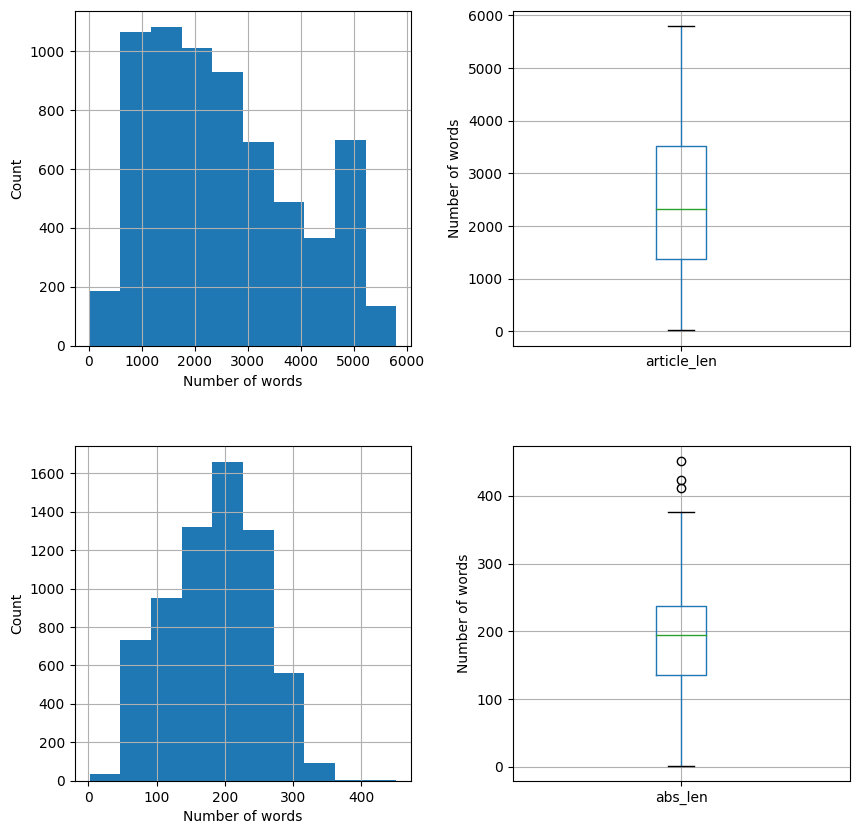

In [ ]:
data['article_len'] = data['article'].str.split().map(lambda x: len(x))
data['abs_len'] = data['abstract'].str.split().map(lambda x: len(x))

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10, 10))

data.hist('article_len',ax = axes[0][0])
data.boxplot('article_len', ax=axes[0][1])
data.hist('abs_len',ax = axes[1][0])
data.boxplot('abs_len', ax=axes[1][1])

axes[0][0].set_title('')
axes[0][0].set_xlabel('Number of words')
axes[0][0].set_ylabel('Count')

axes[0][1].set_xlabel('')
axes[0][1].set_ylabel('Number of words')

axes[1][0].set_title('')
axes[1][0].set_xlabel('Number of words')
axes[1][0].set_ylabel('Count')

axes[1][1].set_xlabel('')
axes[1][1].set_ylabel('Number of words')


### Average word length

Text(0, 0.5, 'Count')

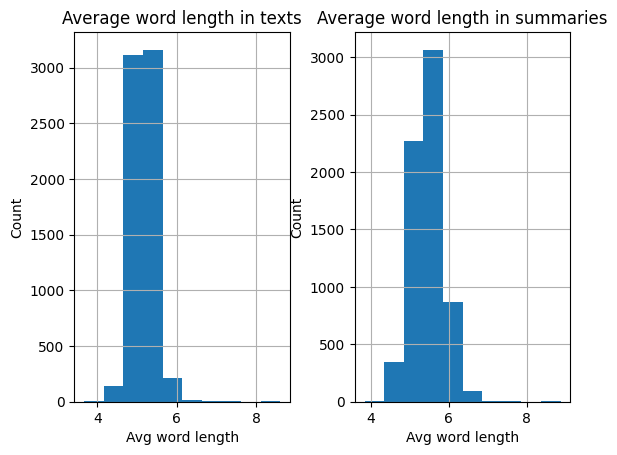

In [ ]:
data['article_wlen'] = data['article'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data['abs_wlen'] = data['abstract'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, axes = plt.subplots(nrows=1,ncols=2)

data.hist('article_wlen',ax = axes[0])
data.hist('abs_wlen',ax = axes[1])

axes[0].set_title('Average word length in texts')
axes[0].set_xlabel('Avg word length')
axes[0].set_ylabel('Count')

axes[1].set_title('Average word length in summaries')
axes[1].set_xlabel('Avg word length')
axes[1].set_ylabel('Count')

### Combined Plots

Text(0, 0.5, 'Average Word Length')

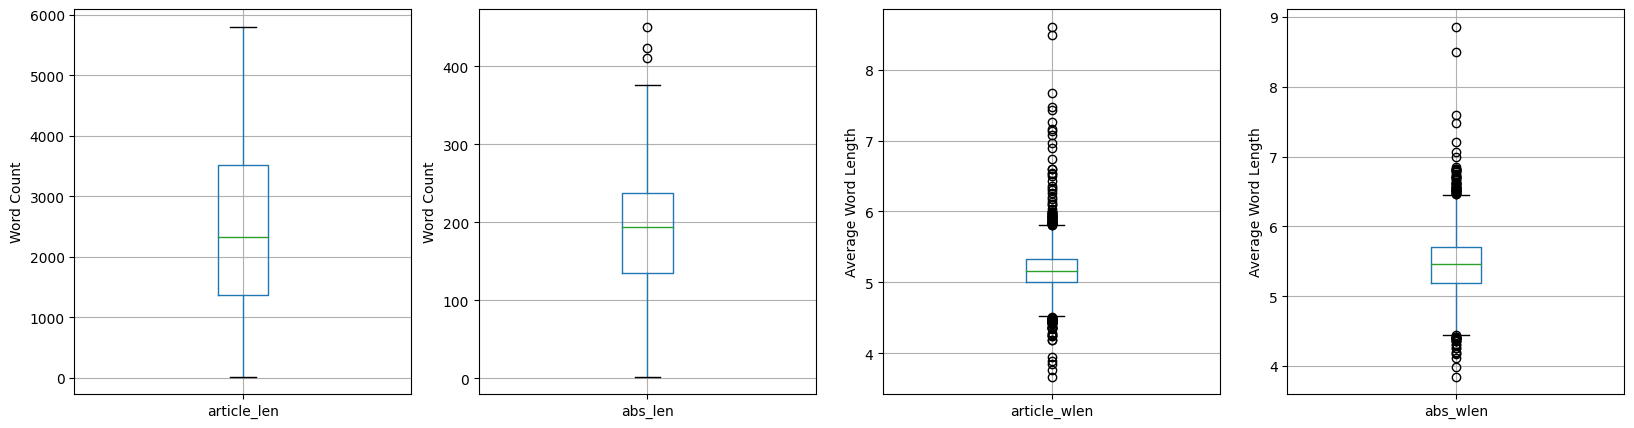

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(20, 5))

data.boxplot('article_len', ax=axes[0])
data.boxplot('abs_len', ax=axes[1])
data.boxplot('article_wlen', ax=axes[2])
data.boxplot('abs_wlen', ax=axes[3])

axes[0].set_ylabel('Word Count')
axes[1].set_ylabel('Word Count')
axes[2].set_ylabel('Average Word Length')
axes[3].set_ylabel('Average Word Length')

In [ ]:
data.describe()

,Unnamed: 0,article_len,abs_len,article_wlen,abs_wlen
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000
mean,3328.500000,2545.975969,185.384800,5.167624,5.458412
std,1922.143378,1385.099331,68.961273,0.276279,0.391284
min,0.000000,20.000000,2.000000,3.666594,3.847059
25%,1664.250000,1373.250000,135.000000,5.001373,5.195498
50%,3328.500000,2322.000000,194.000000,5.156227,5.454158
75%,4992.750000,3513.500000,237.000000,5.324450,5.701188
max,6657.000000,5800.000000,451.000000,8.610454,8.861878


### Most common word counts

Referenced from : https://medium.com/analytics-vidhya/text-based-communication-analysis-with-machine-learning-17138c0a4a4e

In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


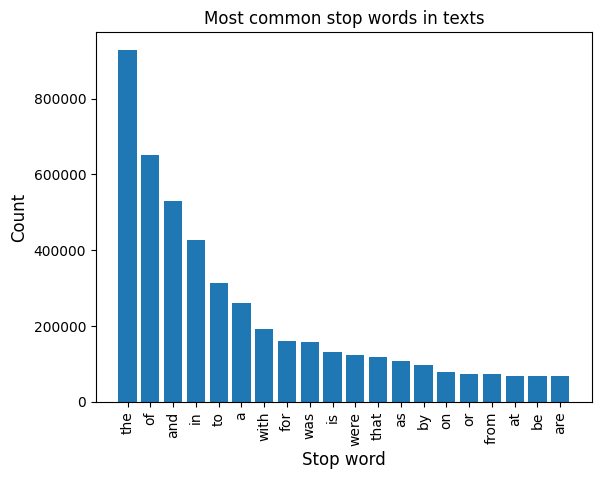

In [ ]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
    x,y=zip(*top)
    plt.bar(x,y)
    plt.title('Most common stop words in texts')
    plt.xlabel('Stop word', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.xticks(rotation=90)

plot_top_stopwords_barchart(data['article'])

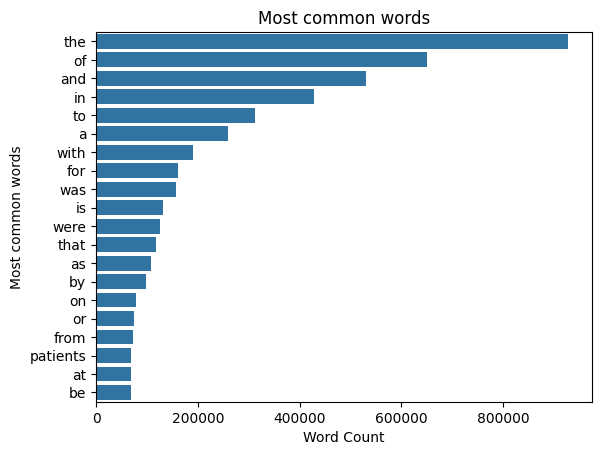

In [ ]:
def plot_top_words_barchart(text):

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:80]:
        if word != '.':
            x.append(word)
            y.append(count)

    ax = sns.barplot(x=y[:20],y=x[:20])
    ax.set(title = 'Most common words')
    ax.set(xlabel='Word Count', ylabel='Most common words')

plot_top_words_barchart(data['article'])

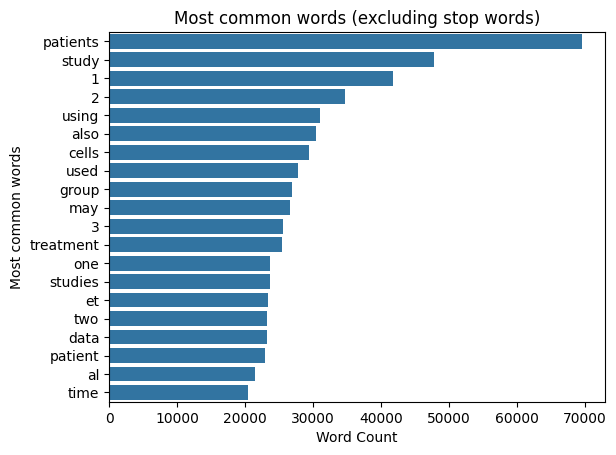

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:80]:
        if (word not in stop) and word != '.':
            x.append(word)
            y.append(count)

    ax = sns.barplot(x=y[:20],y=x[:20])
    ax.set(title = 'Most common words (excluding stop words)')
    ax.set(xlabel='Word Count', ylabel='Most common words')


plot_top_non_stopwords_barchart(data['article'])   ## TBD : clean the punctuations

### N-Grams

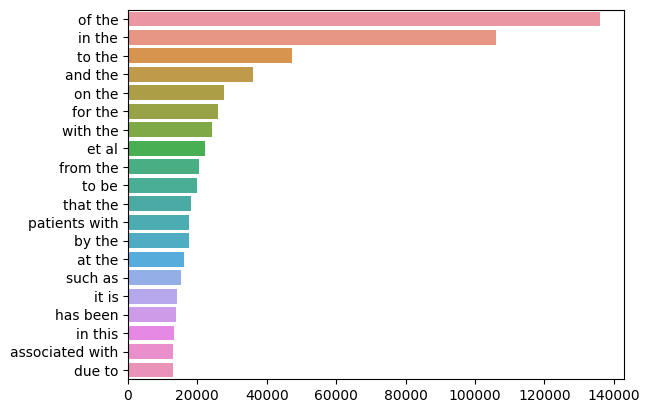

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(data['article'],2)

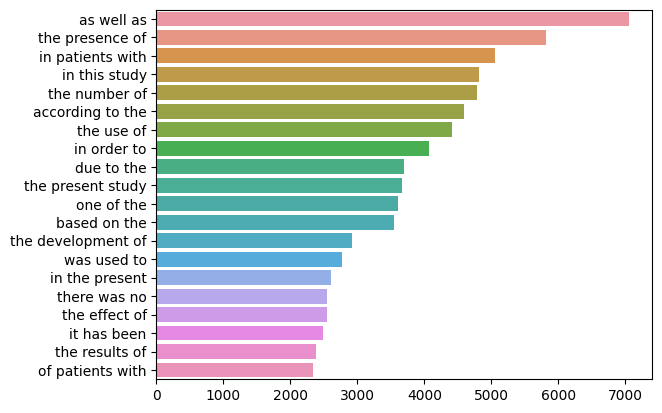

In [ ]:
plot_top_ngrams_barchart(data['article'],3)